# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

<IPython.core.display.Javascript object>


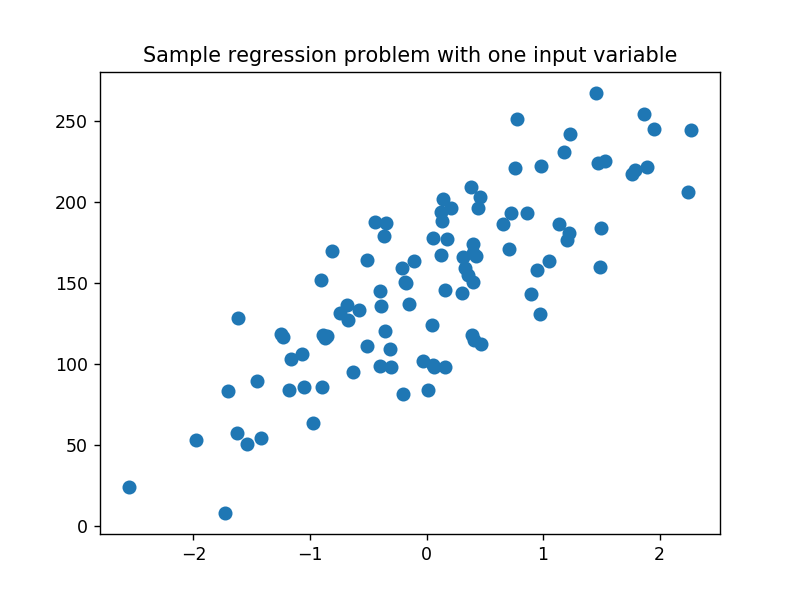

<IPython.core.display.Javascript object>


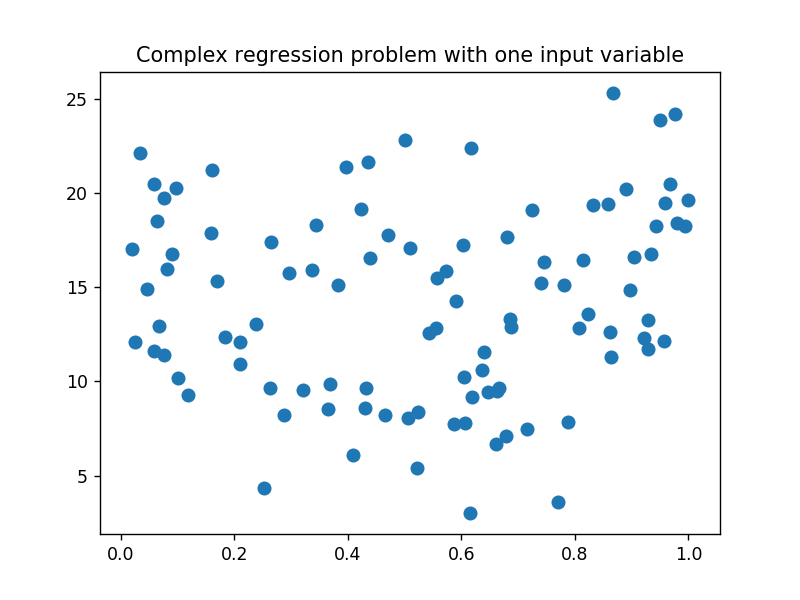

<IPython.core.display.Javascript object>


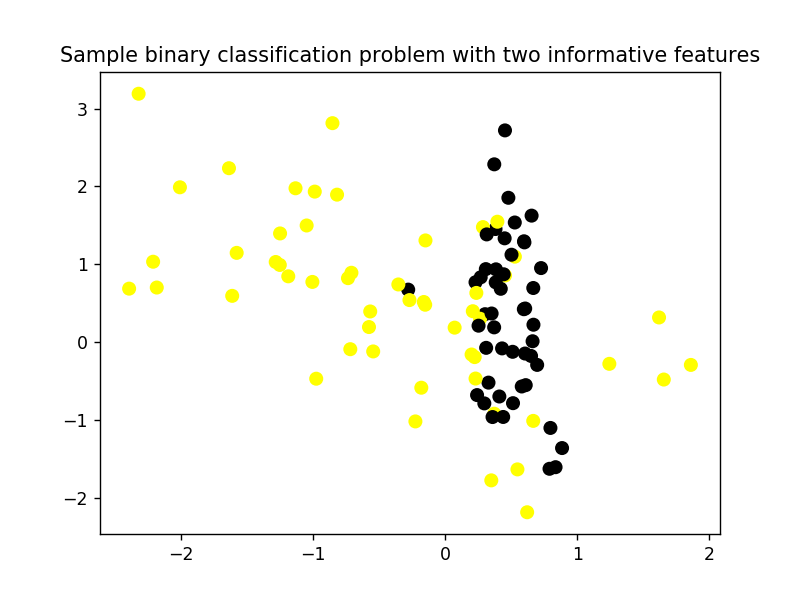

<IPython.core.display.Javascript object>


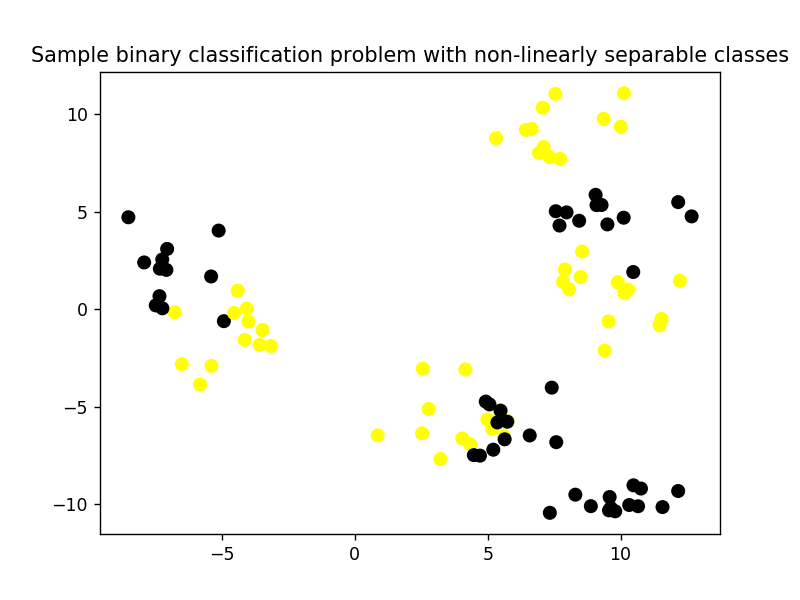

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('C:/Users/Ederson/Documents/python_data_analysis/applied ML/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes classifiers

- related to linear classification
- based on simple probabilistic models of how the data in each class might have been generated
- naive because the they make the simpflying assumption that each feature of an instance is indipendent of all the others, given the class.
   - the features have little/no correlation with each other


- classifier is very fast to learn because only simple per class statitistics need to be estimated for each feature and applied for each feature independently
    - PENALTY: generalization performance can often be worse than other more sophisticated methods or even simple linear models
    - BUT: it works, as in performance, really well for "high dimensional data sets"
    

- Bernoulli Naive Bayes: binary features
    - uses set of binary occurence features.
    - good for classifiing documents 
- Multinominal: discrete features ( word counts)
    - uses a set of count base features each of which does account for how many times a prticular feature such as a word is observed in training, ex: like a documents
- Gaussian: continous/real_valued features
    - during training classifier estimates for eachz feature the meand and STD of the feature value for each class
    - prediction: compares the feat of the example data point to be predicted with the feat. statitistics for each class and selects the class that best matches the data point 
        - assumes the data for each class was generated by simple class specific Gauss distribution
        - it estimates the probabilty that each classes gauss distr was most likely to have generated the data point --> then picks the class that has the highest prob.

<IPython.core.display.Javascript object>


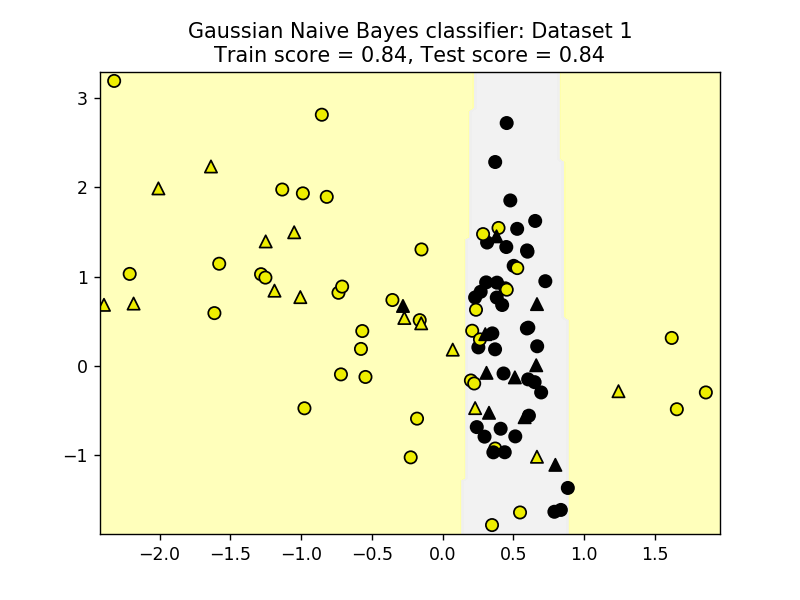

In [14]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
#has method .partial_fit --> it fits incrementally. best for biig data sets, in case you rrun out of memory
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

<IPython.core.display.Javascript object>


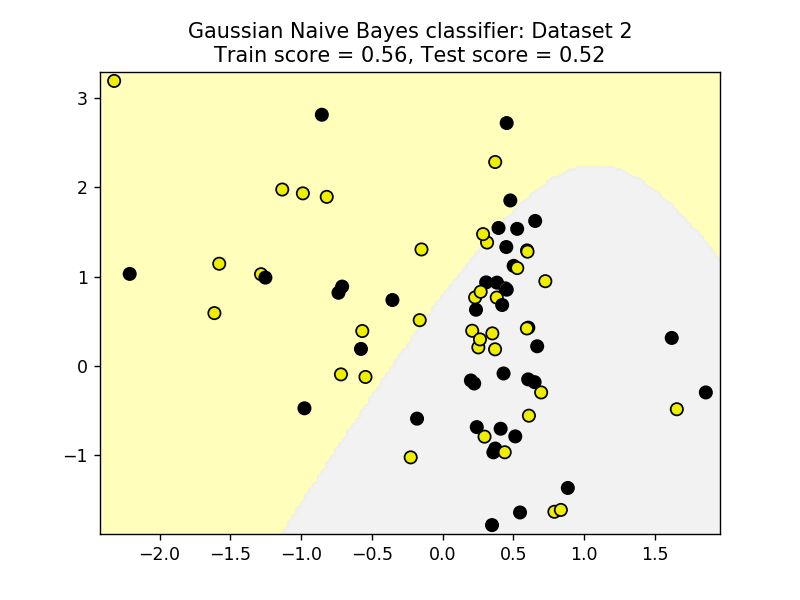

In [16]:
_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

# when classe are no longer easy seperable it performs really bad, like lienar models


### Application to a real-world dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


Pros:
- easy
- simple, effecient parameter estimation
- best with high dimens data
- often useful as a baseline comparison

Cons:
- assumption feat are conditionally indipendent given the class is not realistic
- confidence estimates for predictions are not very accurate

## Ensembles of Decision Trees

- takes multiple individual learning models and combnines them to produce an aggregate model that is more poweful
- effective because it reduces the risk of overfit on different parts of the data caused by the other models when used by themself

### Random forests

 - regression: RandomForestRegressor
 - Classification: RandomForestClassifier
 
 - random forest creates many individual trees on a training set
     - should be constructed to be different in some way from the other trees 
     - Accomplished by introducing random variation into the process of building each tree
         - --> data used to build each tree is randomly selected
         - --> featueres chosen in each split test are randomly selected.
         

<IPython.core.display.Javascript object>


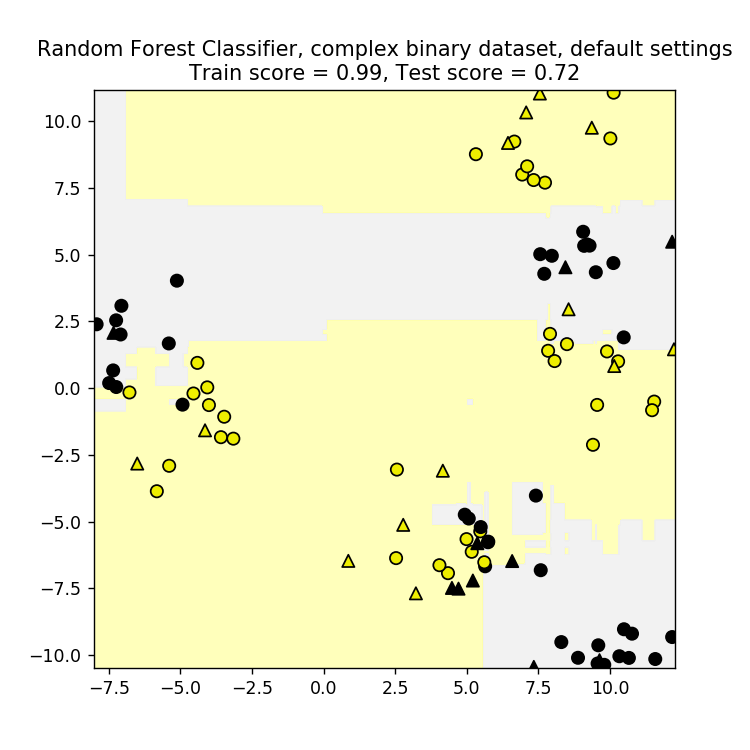

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Random forest: Fruit dataset

<IPython.core.display.Javascript object>


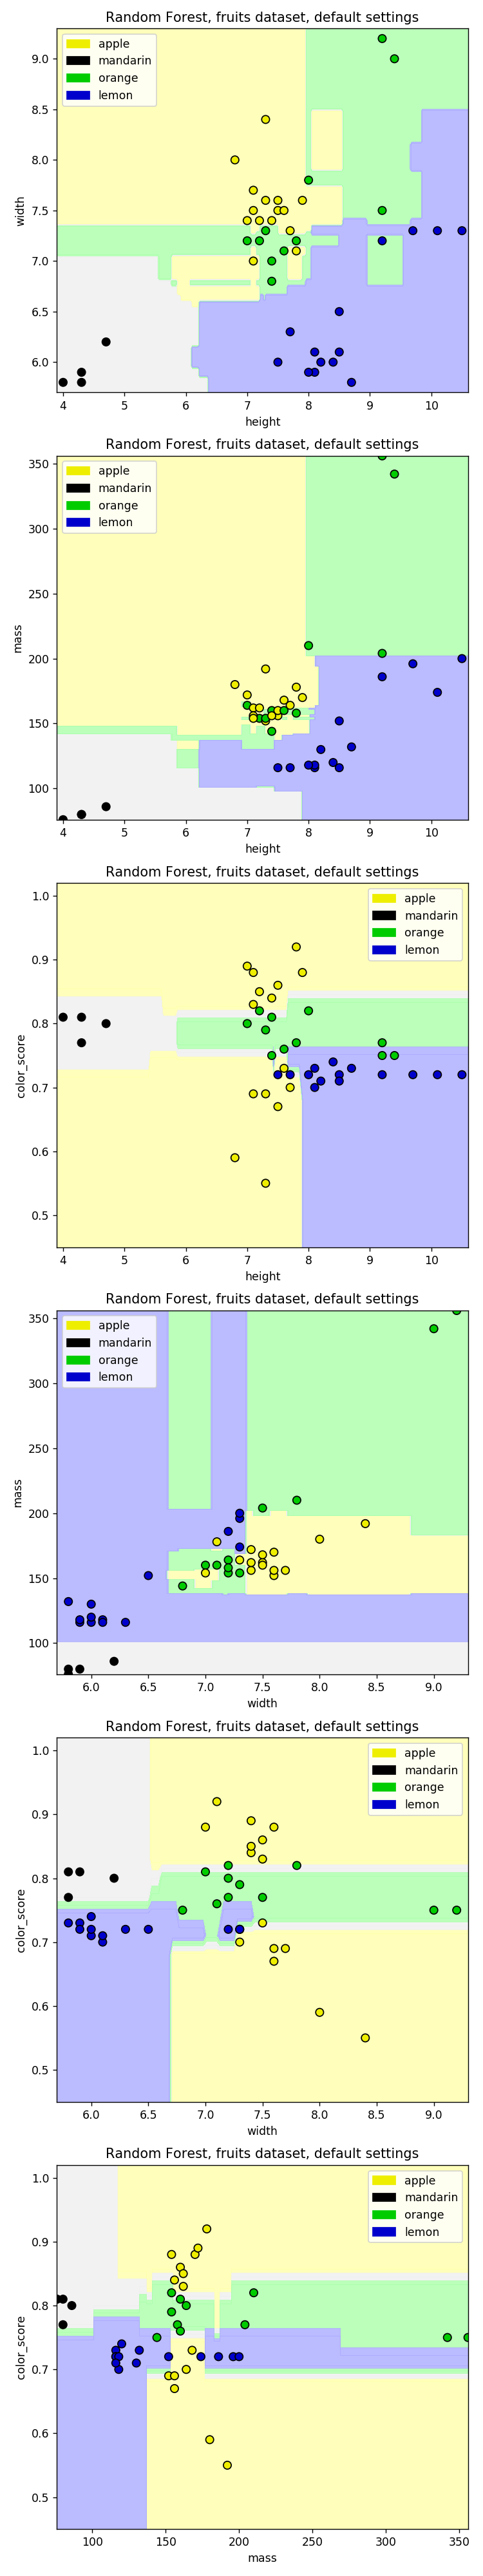

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]] #features pairs

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Random Forests on a real-world dataset

In [27]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8,n_jobs=1, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


Pros:
- widely used, excellent prediciotn performance
- doesnt require caredul normalization of feat. or extensive paramaters setting
- handles a mix of feat. types
- easily parallelized across multiple CPUs

Cons:
- resulting models are diffcult to interpret as a human
- not good for very high dimensional tasks

Key parameters.
- n_estimators: numhber of trees to use ( def is 10)
    - should be larger for larger datasets to reduce overfitting
- max_features: strong effect on performance, influences the tree diversity in the forest
- max_depth: controlls the depth of each tree
- n_jobs: how many cores to use in parallel during trainig

### Gradient-boosted decision trees

- uses multiple trees to create powerfull models
- gradient models build a series of trees, (random forest is...random)
    - each tree is trained so that it corrects mistakes of previous tree in the series
    - uses many "shallow" trees known as week learners, build in a NoNrandom way --> models make fewer and fewer mistakes as more trees are added
- fast and doesnt use alot of memory
- learning rate: controlls how hard each new tree tries to correct mistakes from previous round
    - high:m more complex trees
    - low: simpler trees

key paramaters:
- n_estimators: sets # of small deciosn trees to use
- learning_rate: enphsis on fixing previous errors
- max_depth: typically set small (3-5)

<IPython.core.display.Javascript object>


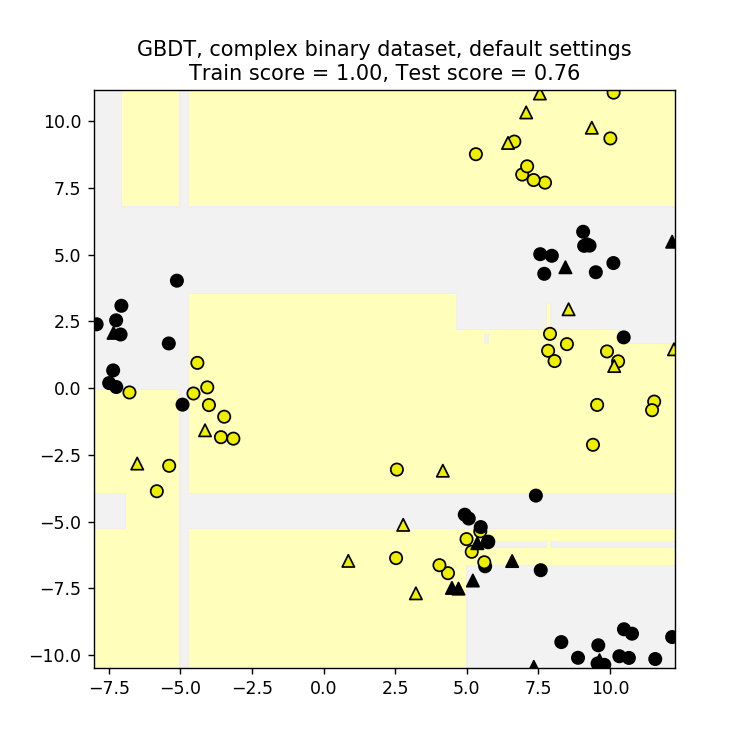

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test =train_test_split(X_D2,y_D2, random_state=0)
fig, subaxes= plt.subplots(1,1, figsize=(6,6))

clf=GradientBoostingClassifier().fit(X_train,y_train)
title="GBDT, complex binary dataset, default settings"
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test, title,subaxes)

#### Gradient boosted decision trees on the fruit dataset

<IPython.core.display.Javascript object>


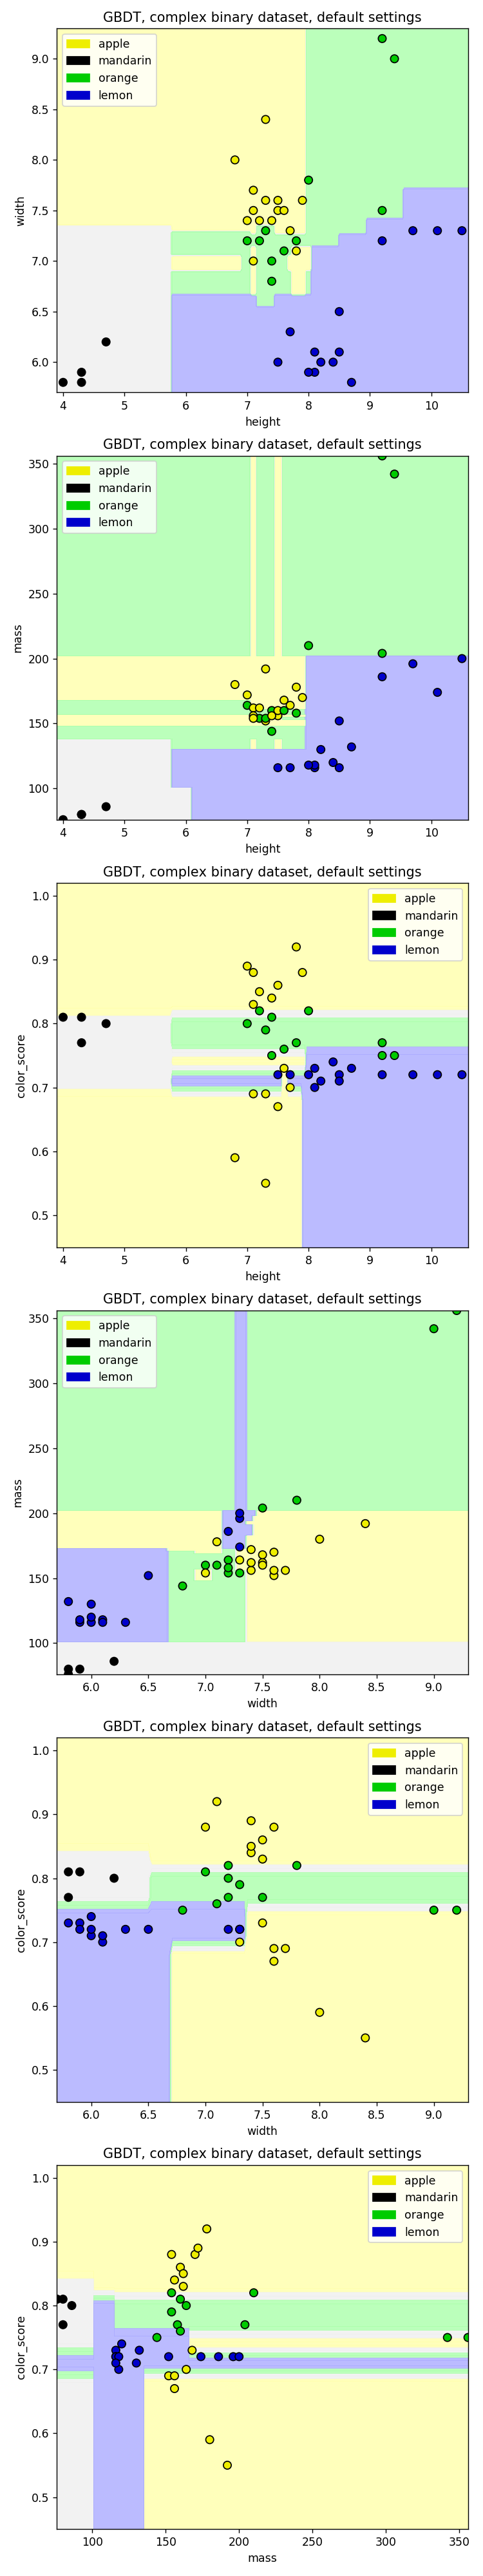

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_lsit=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

for pair, axis in zip(pair_lsit, subaxes):
    X=X_train[:,pair]
    y=y_train
    
    clf=GradientBoostingClassifier().fit(X,y)
    plot_class_regions_for_classifier_subplot(clf,X,y, None,None,title,axis,target_names_fruits)
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


Pros:
- best "off-the-shelf" accuracy on many problems
- uses modest memory and is fast
- doesnt require normalization of features
- handles mixture of data types

Cons:
- difficult to interpret
- need carefull tuning of "learning_rate"
- trainig needs computation
- no good for text classif. and problems with high dimensional features

## Neural networks

### Activation functions

<IPython.core.display.Javascript object>


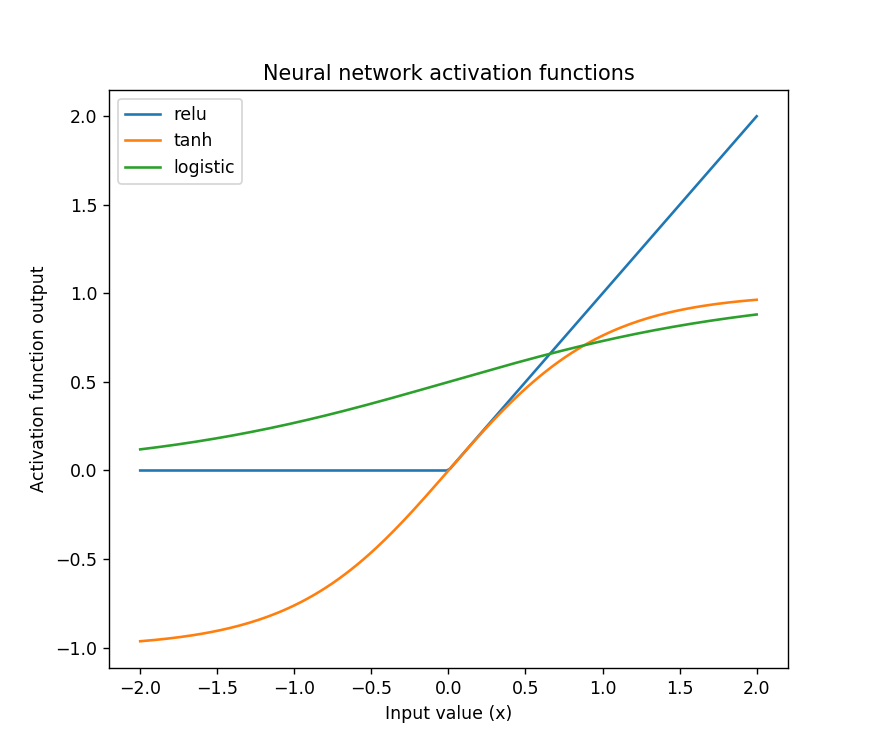

In [12]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

#### Synthetic dataset 1: single hidden layer

<IPython.core.display.Javascript object>


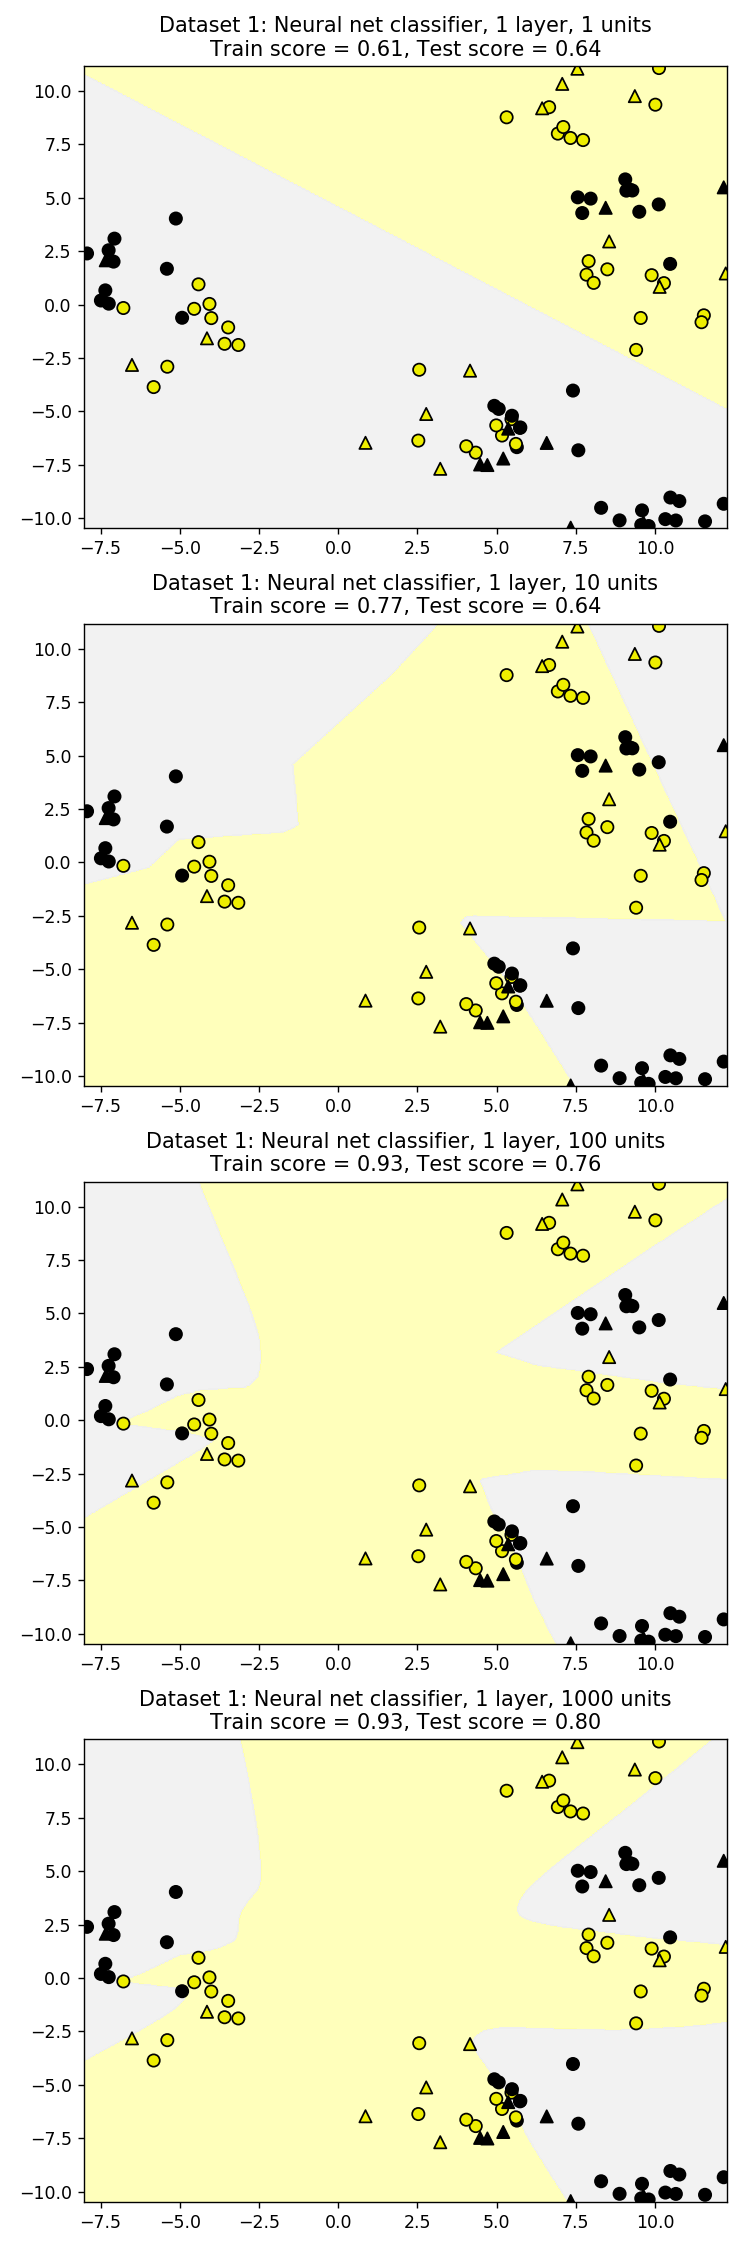

In [25]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100,1000],subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

                      
# RAM: ~4Gb for 1000 units                        

#### Synthetic dataset 1: two hidden layers

<IPython.core.display.Javascript object>


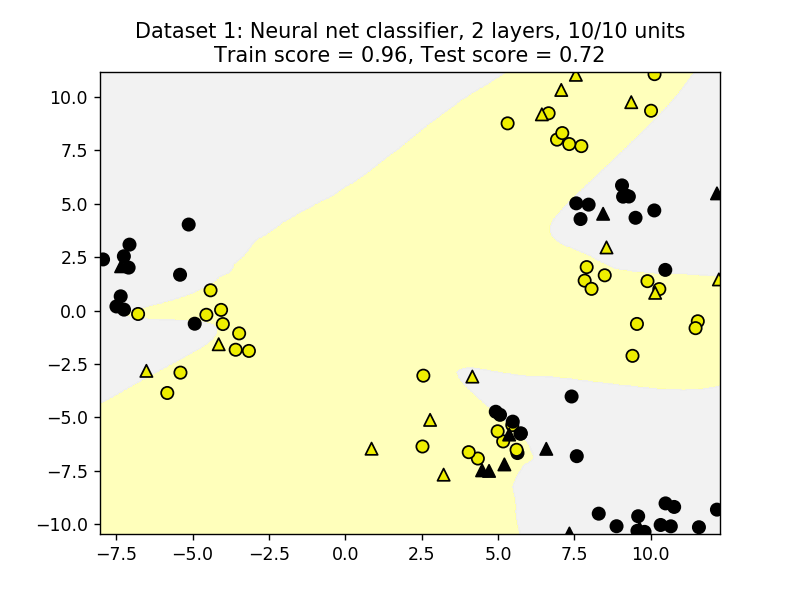

In [27]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 100], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

# took 2.5minutes with layer size=[1000,1000]

#### Regularization parameter: alpha

<IPython.core.display.Javascript object>


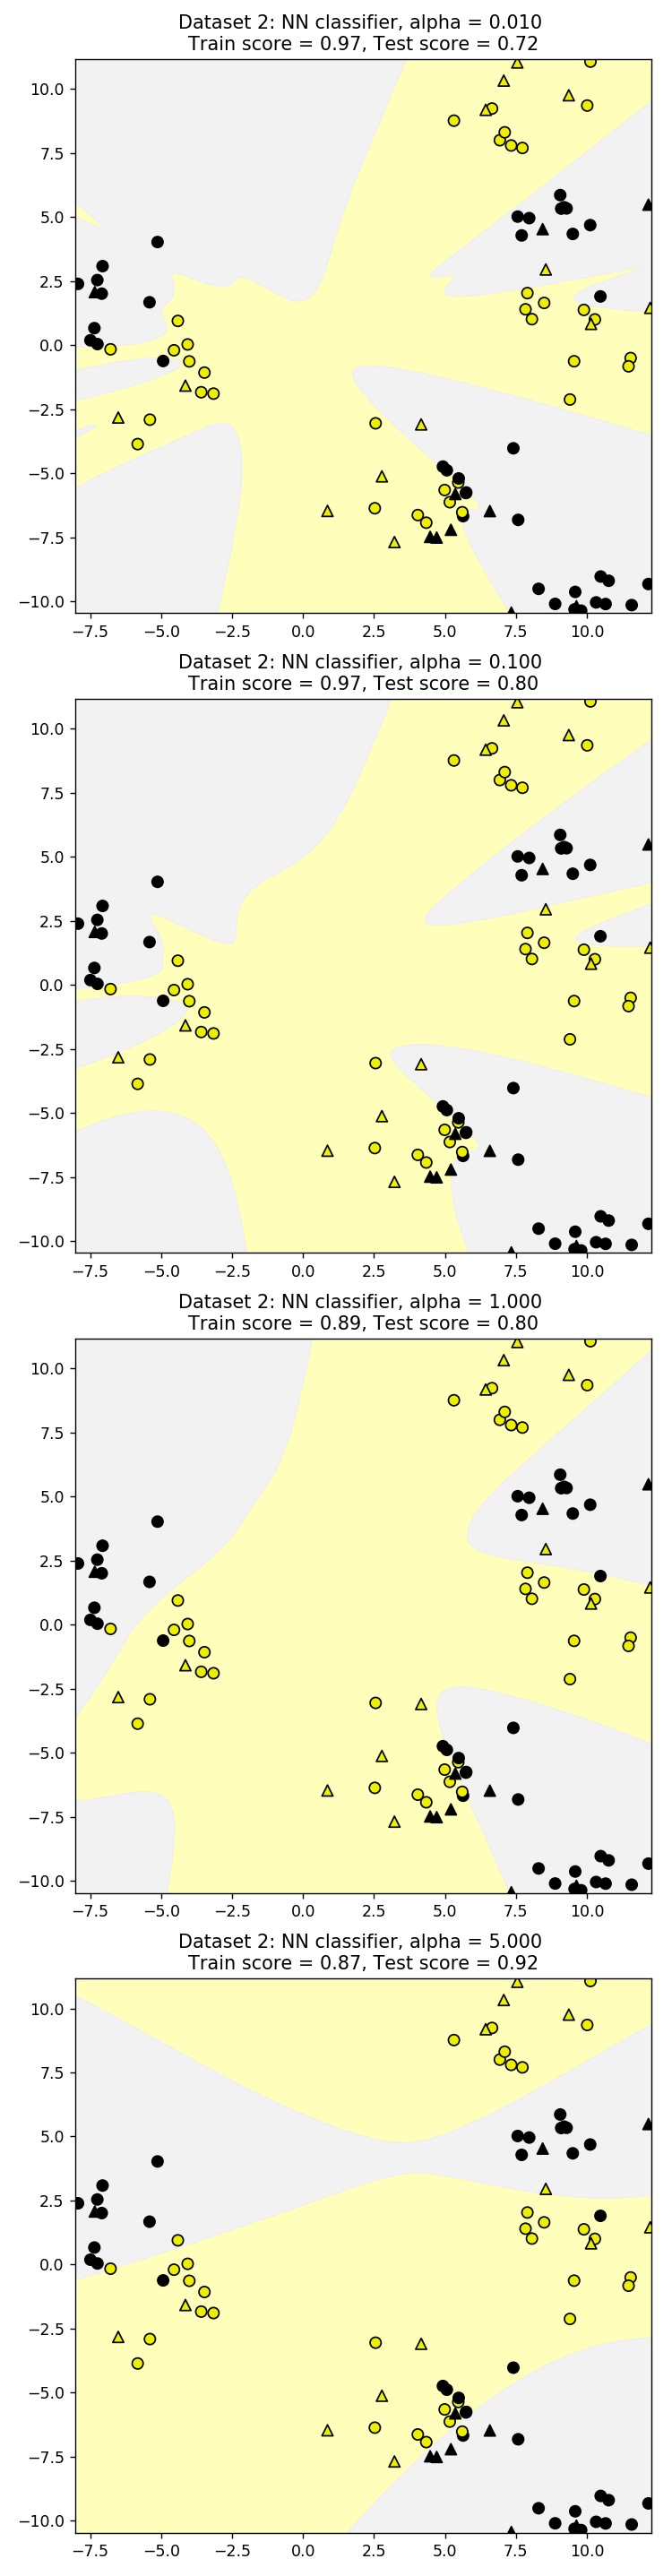

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

#### The effect of different choices of activation function

<IPython.core.display.Javascript object>


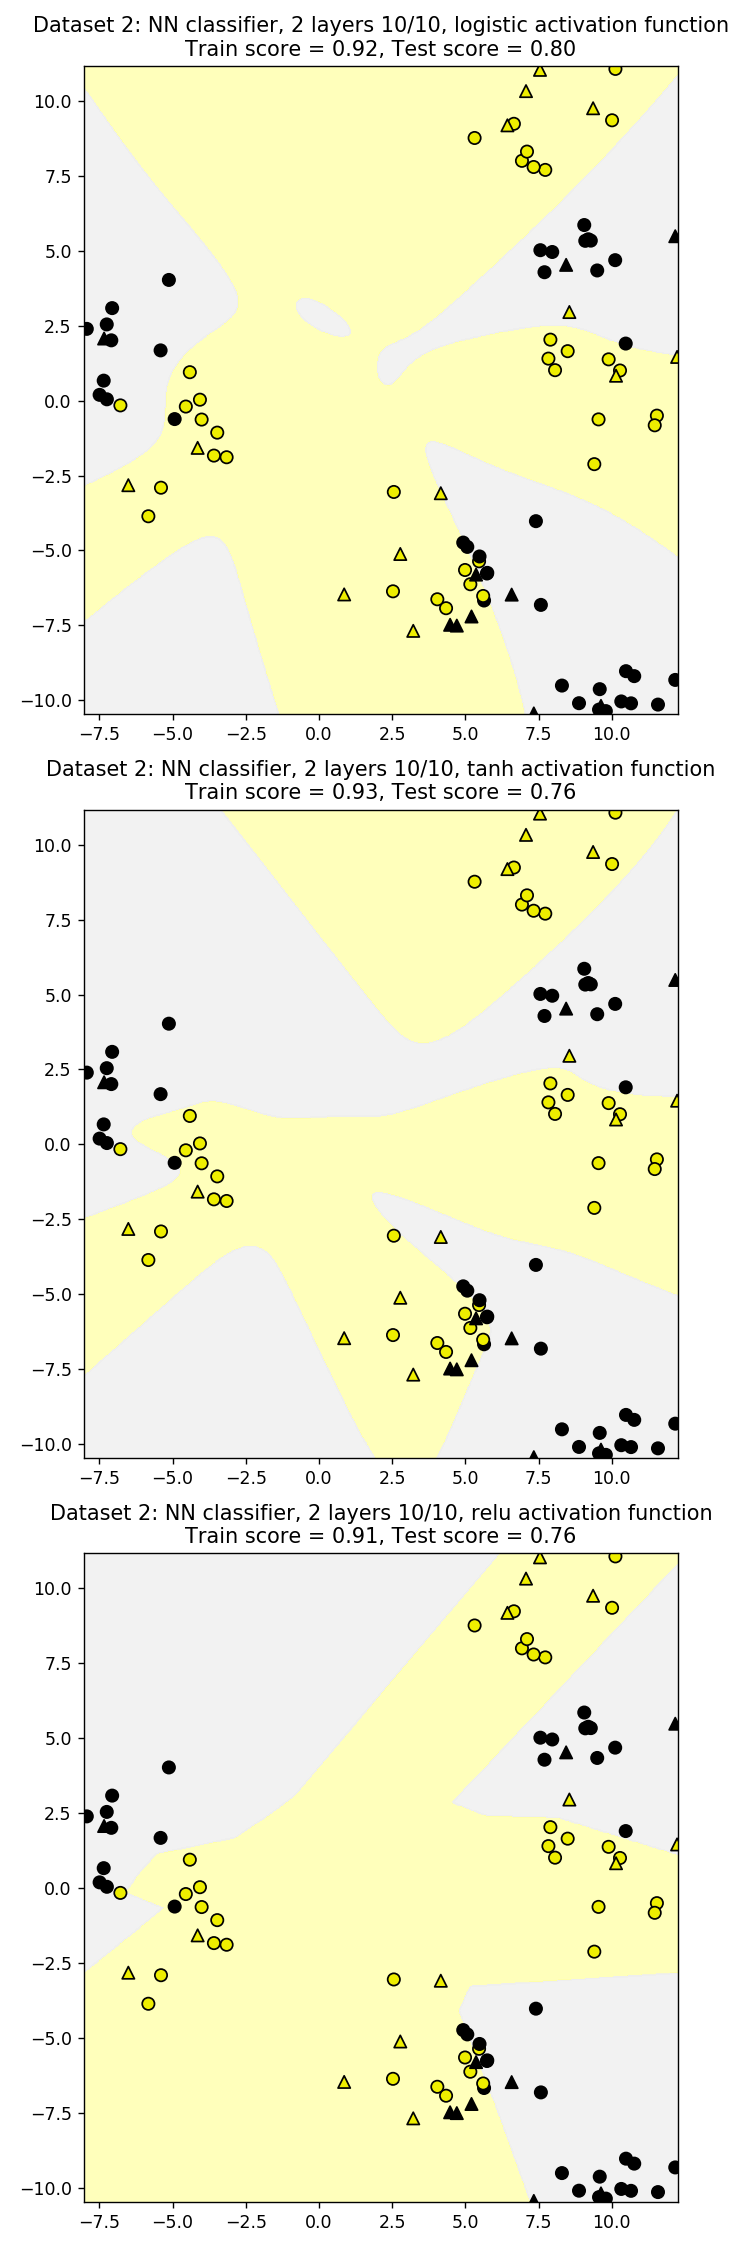

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(["logistic","tanh","relu"], subaxes):
    nnclf=MLPClassifier(solver="lbfgs",activation=this_activation,alpha=0.1, hidden_layer_sizes=[10,10],
                        random_state=0).fit(X_train,y_train)
    title='Dataset 2: NN classifier, 2 layers 10/10, {} activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf,X_train,y_train, X_test, y_test,title, axis)
    plt.tight_layout()
    
                                            
    

### Neural networks: Regression

<IPython.core.display.Javascript object>


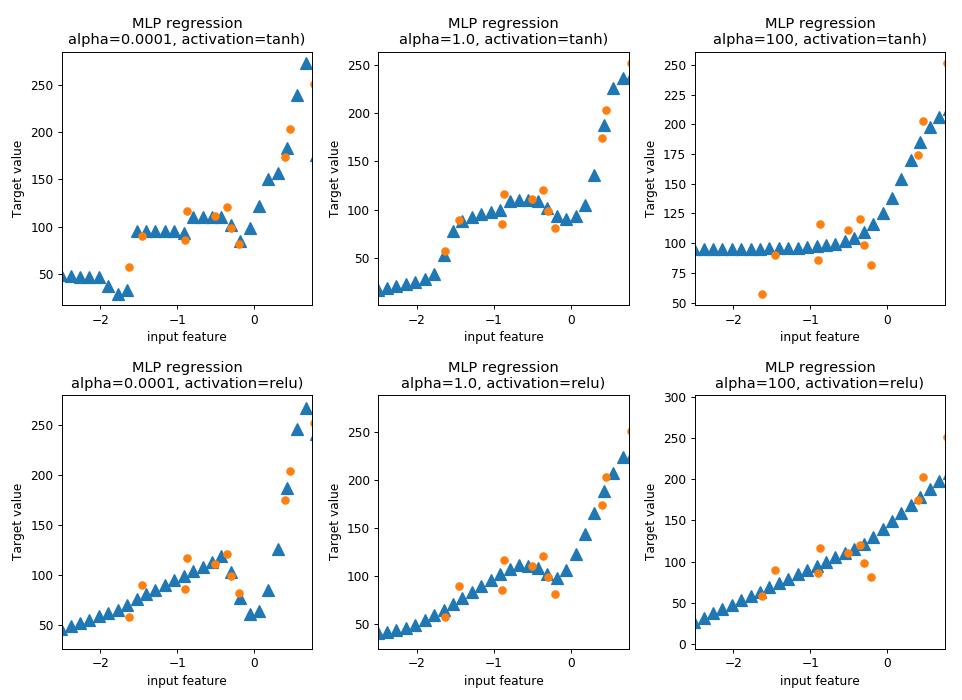

In [32]:
from sklearn.neural_network import MLPRegressor

fig, subaxes=plt.subplots(2,3, figsize=(11,8), dpi=70)

X_predict_input=np.linspace(-3,3,50).reshape(-1,1)
X_train, X_test, y_train, y_test =train_test_split(X_R1[0::5],y_R1[0::5], random_state=0)

for thisaxisrow, thisactivation in zip(subaxes, ["tanh","relu"]):
    for thisalpha, thisaxis in zip([0.0001,1.0,100], thisaxisrow):
        mlpreg=MLPRegressor(hidden_layer_sizes=[100,100],
                           activation=thisactivation,
                           alpha=thisalpha,
                           solver="lbfgs").fit(X_train,y_train)
        y_predict_output=mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5,0.75])
        thisaxis.plot(X_predict_input,y_predict_output,"^", markersize=10)
        thisaxis.plot(X_train,y_train,"o")
        thisaxis.set_xlabel("input feature")
        thisaxis.set_ylabel("Target value")
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

<IPython.core.display.Javascript object>


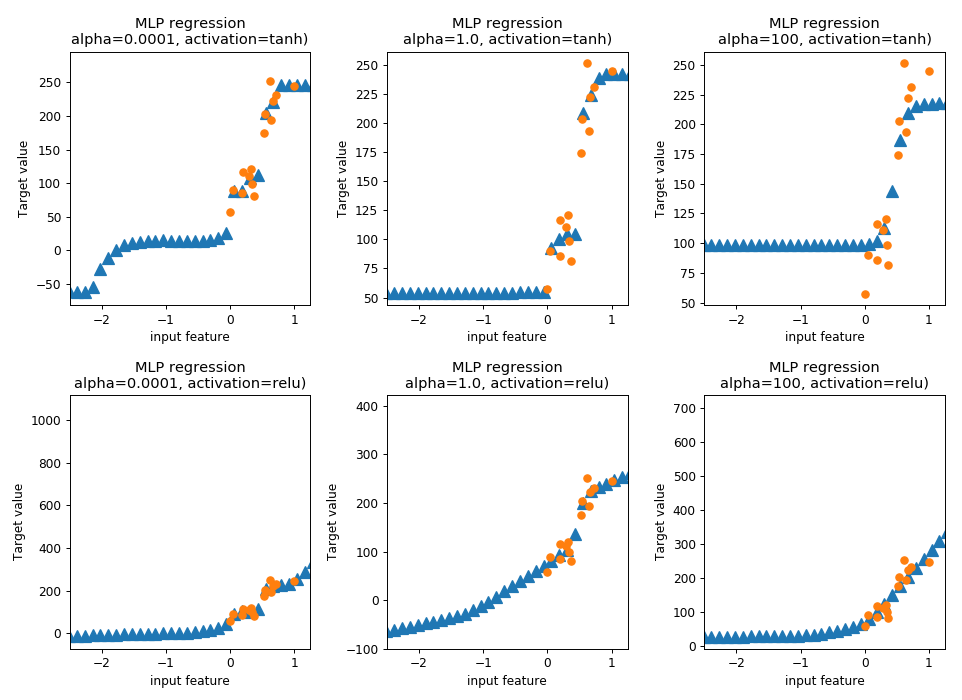

In [39]:
#with normalization (0,1)
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

fig, subaxes=plt.subplots(2,3, figsize=(11,8), dpi=70)

X_predict_input=np.linspace(-3,3,50).reshape(-1,1)
X_train, X_test, y_train, y_test =train_test_split(X_R1[0::5],y_R1[0::5], random_state=0)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)



for thisaxisrow, thisactivation in zip(subaxes, ["tanh","relu"]):
    for thisalpha, thisaxis in zip([0.0001,1.0,100], thisaxisrow):
        mlpreg=MLPRegressor(hidden_layer_sizes=[100,100],
                           activation=thisactivation,
                           alpha=thisalpha,
                           solver="lbfgs").fit(X_train_scaled,y_train)
        y_predict_output=mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5,1.25])
        thisaxis.plot(X_predict_input,y_predict_output,"^", markersize=10)
        thisaxis.plot(X_train_scaled,y_train,"o")
        thisaxis.set_xlabel("input feature")
        thisaxis.set_ylabel("Target value")
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

#### Application to real-world dataset for classification

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train, X_test,y_train,y_test=train_test_split(X_cancer,y_cancer, random_state=0)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=MLPClassifier(hidden_layer_sizes=[100,100], alpha=0.5,random_state=0,solver="lbfgs").fit(X_train_scaled,y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.99
Accuracy of NN classifier on test set: 0.96
